# I] Import

In [1]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
from matplotlib_venn import venn2
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

## functions & options


# II] Dataframe download

In [3]:
%%time
# DL liver samples IDs for normal and primary tumors
path = input_file_directory +'samples_IDs/Organ_specific_samples/'
directory = path + "samples_liver.tsv"
liver_samples_IDs= pandas.read_csv(directory, sep = "\t")
print(liver_samples_IDs.shape)

liver_samples_IDs = liver_samples_IDs.drop('samples', axis = 1)
liver_samples_IDs.head()

(479, 4)
Wall time: 12.9 ms


,sample,_sample_type,_primary_site
0,GTEX-1192X-1026-SM-5H12P,Normal Tissue,Liver
1,GTEX-11DXY-0526-SM-5EGGQ,Normal Tissue,Liver
2,GTEX-11DXZ-0126-SM-5EGGY,Normal Tissue,Liver
3,GTEX-11EQ9-0526-SM-5A5JZ,Normal Tissue,Liver
4,GTEX-11NUK-1226-SM-5P9GM,Normal Tissue,Liver


In [4]:
%%time
# DL all data ATG7 isoform expression
path = output_file_directory + "/ATG7/TCGA_GTEX/dataframes_for_input/df_ATG7_NormPrim.csv"
df_ATG7_NormPrim= pandas.read_csv(path, sep = ",")

#remove Survival information
df_ATG7_NormPrim.drop(df_ATG7_NormPrim.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_NormPrim.shape)
df_ATG7_NormPrim.head(2)

(16614, 20)
Wall time: 88.8 ms


,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-ZTTD-0326-SM-57WFW,Normal Tissue,Muscle,5.042,3.860,2.390,0.2642,32.944283,14.519306,5.240574,1.199970,5.085097,3.955992,2.641679,20.95985,69.271996,25.002916,5.725088,0.440723,0.159074
1,GTEX-PX3G-1626-SM-2S1PT,Normal Tissue,Muscle,4.252,2.322,1.956,1.1320,19.052710,4.999249,3.878848,2.190624,4.325725,2.584782,2.286540,11.06872,45.165557,35.043325,19.791118,0.262390,0.203585


In [5]:
#Do not have negative tpm
print("min:", df_ATG7_NormPrim['ATG7_1tpm'].min())
test = df_ATG7_NormPrim
df_ATG7_NormPrim['ATG7_1tpm'] = numpy.where(df_ATG7_NormPrim['ATG7_1tpm'] < 0, 0, df_ATG7_NormPrim['ATG7_1tpm'])
df_ATG7_NormPrim['ATG7_2tpm'] = numpy.where(df_ATG7_NormPrim['ATG7_2tpm'] < 0, 0, df_ATG7_NormPrim['ATG7_2tpm'])
print("min:", df_ATG7_NormPrim['ATG7_1tpm'].min())

min: -1.4951130035000156e-07
min: 0.0


In [6]:
#find number of normal tissue
nb_normal = len(liver_samples_IDs[liver_samples_IDs['_sample_type'] == 'Normal Tissue'])

#select normal and primary separatlydd
normal_liver_labels = liver_samples_IDs.iloc[:nb_normal ,0:1]
print('number of normal tissue:', len(normal_liver_labels))

primary_liver_labels = liver_samples_IDs.iloc[nb_normal: ,0:1]
print('number of primary tumors:', len(primary_liver_labels))
print('\n', normal_liver_labels.head())

number of normal tissue: 110
number of primary tumors: 369

                      sample
0  GTEX-1192X-1026-SM-5H12P
1  GTEX-11DXY-0526-SM-5EGGQ
2  GTEX-11DXZ-0126-SM-5EGGY
3  GTEX-11EQ9-0526-SM-5A5JZ
4  GTEX-11NUK-1226-SM-5P9GM


In [7]:
#create a df_ATG7_NormPrim only with liver
df_ATG7_NormPrim_liver = liver_samples_IDs.merge(df_ATG7_NormPrim)
print('size should be:',110+369)
df_ATG7_NormPrim_liver.shape

size should be: 479


(479, 22)

In [8]:
#subset, split normal and primary
df_ATG7_Normal_liver = normal_liver_labels.merge(df_ATG7_NormPrim)
df_ATG7_Primary_liver = primary_liver_labels.merge(df_ATG7_NormPrim)

print(df_ATG7_Normal_liver.shape)
print(df_ATG7_Primary_liver.shape)
print(df_ATG7_Primary_liver.iloc[:,0:5].head())

(110, 20)
(369, 20)
            sample    Sample_Type Primary_Site   ATG7  ATG7_1
0  TCGA-2V-A95S-01  Primary Tumor        Liver  2.778   2.526
1  TCGA-2Y-A9GS-01  Primary Tumor        Liver  4.198   2.919
2  TCGA-2Y-A9GT-01  Primary Tumor        Liver  2.539   1.541
3  TCGA-2Y-A9GU-01  Primary Tumor        Liver  2.712   1.556
4  TCGA-2Y-A9GV-01  Primary Tumor        Liver  3.048   1.637


# II] Dataframe download

## all gene expression data + atg7 isoforms

In [9]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors for liver
path = output_file_directory + "/dataframes_for_input/liver/"
ensembl_normal_liver_atg7_proteinGE = pandas.read_csv(path+"ensembl_normal_liver_atg7_proteinGE.tsv", sep = "\t")
ensembl_primary_liver_atg7_proteinGE = pandas.read_csv(path+"ensembl_primary_liver_atg7_proteinGE.tsv", sep = "\t")

print(ensembl_normal_liver_atg7_proteinGE.shape)
print(ensembl_primary_liver_atg7_proteinGE.shape)
ensembl_normal_liver_atg7_proteinGE.head(2)

(110, 19387)
(369, 19387)
Wall time: 8.07 s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Liver,4.146,2.6020,2.211,12.1227,12.469,12.8944,12.8383,13.4944,...,0.9038,5.9028,4.9477,1.9073,5.9903,5.7578,1.4911,6.6100,6.8698,5.0854
1,Normal Tissue,Liver,3.453,0.5069,2.208,13.0273,13.408,13.5398,13.9006,14.5052,...,0.6699,5.5808,4.1539,0.0014,5.3548,5.0211,1.0151,6.3555,3.3105,2.2082


In [10]:
%%time
#download the protein coding list. will be useful with correlation results.
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 35.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


# IV] Expression correlation 

In [11]:
#to know the ensembl code for HK2
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'MFAP3']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
19160,ENSG00000037749,MFAP3,4238.0,protein_coding


## 1) Data preparation

In [12]:
ensembl_primary_liver_atg7_proteinGE.head()

,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198888,ENSG00000198763,ENSG00000198804,ENSG00000198712,ENSG00000228253,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Primary Tumor,Liver,4.517,3.000,2.9110,12.4955,13.5057,13.2462,13.8849,13.3103,...,1.0642,5.1363,5.1073,1.6785,3.8380,4.9547,0.4340,6.0792,3.4477,4.6130
1,Primary Tumor,Liver,4.487,3.022,2.2810,11.5669,12.1958,13.6812,13.6428,13.1039,...,4.8238,6.9701,6.5026,0.6332,3.9947,5.4420,2.5263,6.9790,1.3956,4.5632
2,Primary Tumor,Liver,4.428,3.968,-2.5480,10.5765,10.8512,12.6795,13.1709,12.3642,...,1.3167,5.7885,5.1863,-0.1993,5.1696,6.2186,1.4011,6.4933,3.8837,5.5874
3,Primary Tumor,Liver,4.410,3.915,-0.0130,12.4415,12.3455,13.1002,13.0201,12.2521,...,0.9568,6.6469,6.3176,1.2394,4.4263,5.8485,3.4504,7.2433,4.6023,4.8997
4,Primary Tumor,Liver,4.323,3.952,-0.6193,11.1251,11.4593,12.4586,12.5747,11.8480,...,-0.7834,5.7241,5.2552,0.3573,3.8896,6.3196,1.4120,7.0125,3.9608,5.0251


In [13]:
%%time
# Spearman Correlation, all genes WITHOUT cutoff. Removed genes < 4tpm
all_tissue_used = [[ensembl_normal_liver_atg7_proteinGE,'Normal_liver'], 
                   [ensembl_primary_liver_atg7_proteinGE,'Primary_liver']]

isoforms = ['ATG7_1', 'ATG7_2']

all_positiv_corr_spearman = []
all_negativ_corr_spearman = []

for tissue in all_tissue_used:
  print(tissue[1], tissue[0].shape)

  #create a new row with max() for each gene and transpose
  tissue[0].loc['max()'] = tissue[0].max()
  tissue[0] = tissue[0].T

  #select all row where max() > 2 (= 4 tpm)
  nb_before = tissue[0]['max()'].count()
  tissue[0] = tissue[0].drop(tissue[0].index[0:2])
  tissue[0] = tissue[0][tissue[0]['max()'] > 2]
  nb_after = tissue[0]['max()'].count()
  print("number of genes removed:", nb_before-nb_after)
  print('the minimum of TPM is', tissue[0]['max()'].min())
  
  #delete the column max() and tranpose back
  tissue[0] =  tissue[0].drop('max()', axis = 1) 
  tissue[0] = tissue[0].T
  print('nombre genes after removing < 5tpm', tissue[0].shape)

  for isoform in isoforms:

    genepos = []
    geneneg = []
    rvaluepos = []
    rvalueneg = []
    pvaluepos = []
    pvalueneg = []

    print(isoform)
    x = tissue[0][isoform].to_list()
    genes = tissue[0].columns[3:]

    for gene in genes:
      y = tissue[0][gene].to_list()
      r_value, p_value = scipy.stats.spearmanr(x, y)

      if r_value > 0:
        genepos.append(gene)
        rvaluepos.append(r_value)
        pvaluepos.append(p_value)
        
      elif r_value < 0:
        geneneg.append(gene)
        rvalueneg.append(r_value)
        pvalueneg.append(p_value)

    #create a dictionnary
    d = dict(ensembl_gene_id= genepos, r_value=rvaluepos,  p_value=pvaluepos)
    d2 = dict(ensembl_gene_id= geneneg, r_value=rvalueneg,  p_value=pvalueneg)

    #Convert to dataframe
    df_positiv_corr = pandas.DataFrame.from_dict(d, orient='index')
    df_negativ_corr = pandas.DataFrame.from_dict(data=d2, orient='index')

    #Transpose to have a better table
    df_positiv_corr = df_positiv_corr.transpose()
    df_negativ_corr = df_negativ_corr.transpose()

    #name
    positiv_corr = 'pos_spearman_corr_'+tissue[1]+'_'+isoform
    negativ_corr = 'neg_spearman_corr_'+tissue[1]+'_'+isoform

    print(positiv_corr, df_positiv_corr.shape)
    print(negativ_corr, df_negativ_corr.shape)

    #scending orde, save to excel
    df_positiv_corr['info'] = tissue[1]+'_'+isoform
    df_positiv_corr = protein_coding_list.merge(df_positiv_corr)
    df_positiv_corr = df_positiv_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_positiv_corr = df_positiv_corr.sort_values(['r_value'], ascending = False)
    
    #save positive
    path = 'ATG7/table_correlation_enrichr/all_tissue_ATG7/corr_all/'
#     df_positiv_corr.to_excel(output_file_directory+path+positiv_corr+'.xlsx', index=False)
    
    df_negativ_corr['info'] = tissue[1]+'_'+isoform
    df_negativ_corr = protein_coding_list.merge(df_negativ_corr)
    df_negativ_corr = df_negativ_corr.drop(['entrezgene_id', 'transcript_biotype'], axis = 1)
    df_negativ_corr = df_negativ_corr.sort_values(['r_value'], ascending = False)
    
    #save negative
#     df_negativ_corr.to_excel(output_file_directory+path+negativ_corr+'.xlsx', index=False)

    all_positiv_corr_spearman.append(df_positiv_corr)
    all_negativ_corr_spearman.append(df_negativ_corr)
  print()

Normal_liver (110, 19387)
number of genes removed: 6345
the minimum of TPM is 2.0004
nombre genes after removing < 5tpm (110, 13042)
ATG7_1
pos_spearman_corr_Normal_liver_ATG7_1 (11890, 3)
neg_spearman_corr_Normal_liver_ATG7_1 (1149, 3)
ATG7_2
pos_spearman_corr_Normal_liver_ATG7_2 (9749, 3)
neg_spearman_corr_Normal_liver_ATG7_2 (3290, 3)

Primary_liver (369, 19387)
number of genes removed: 3591
the minimum of TPM is 2.0004
nombre genes after removing < 5tpm (369, 15796)
ATG7_1
pos_spearman_corr_Primary_liver_ATG7_1 (11464, 3)
neg_spearman_corr_Primary_liver_ATG7_1 (4329, 3)
ATG7_2
pos_spearman_corr_Primary_liver_ATG7_2 (13376, 3)
neg_spearman_corr_Primary_liver_ATG7_2 (2417, 3)

Wall time: 53.8 s


## 2) Distribution of all rvalue to select cutoffif we need one

In [14]:
%%time
#Merge Negative and Positive data
data =  [
         [all_negativ_corr_spearman[0], all_positiv_corr_spearman[0], 'Normal liver, ATG7(1)'], 
         [all_negativ_corr_spearman[1], all_positiv_corr_spearman[1], 'Normal liver, ATG7(2)'],
         [all_negativ_corr_spearman[2], all_positiv_corr_spearman[2], 'Primary liver, ATG7(1)'], 
         [all_negativ_corr_spearman[3], all_positiv_corr_spearman[3], 'Primary liver, ATG7(2)']
         ]

all_corr_negpos_merged = []
for dfs in data:
  print(dfs[2])
  print('shape positiv', dfs[0].shape)
  print('shape negativ', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_negpos_merged.append(df_merged)
  print()

all_corr_negpos_merged[1]

Normal liver, ATG7(1)
shape positiv (1155, 5)
shape negativ (11962, 5)
shape after merge (13117, 5)

Normal liver, ATG7(2)
shape positiv (3309, 5)
shape negativ (9808, 5)
shape after merge (13117, 5)

Primary liver, ATG7(1)
shape positiv (4352, 5)
shape negativ (11544, 5)
shape after merge (15896, 5)

Primary liver, ATG7(2)
shape positiv (2438, 5)
shape negativ (13458, 5)
shape after merge (15896, 5)

Wall time: 20 ms


,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
0,ENSG00000115648,MLPH,-3.24789e-05,0.999731,Normal_liver_ATG7_2
1,ENSG00000184058,TBX1,-9.05722e-05,0.999251,Normal_liver_ATG7_2
2,ENSG00000140876,NUDT7,-0.000482544,0.996008,Normal_liver_ATG7_2
3,ENSG00000117448,AKR1A1,-0.00055678,0.995394,Normal_liver_ATG7_2
4,ENSG00000119508,NR4A3,-0.000633481,0.994759,Normal_liver_ATG7_2
...,...,...,...,...,...
13112,ENSG00000099797,TECR,0.000338708,0.997198,Normal_liver_ATG7_2
13113,ENSG00000120049,KCNIP2,0.000329463,0.997274,Normal_liver_ATG7_2
13114,ENSG00000155287,SLC25A28,0.000215753,0.998215,Normal_liver_ATG7_2
13115,ENSG00000154079,SDHAF4,0.000204161,0.998311,Normal_liver_ATG7_2


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


shape normal (13117, 5)
shape primary (13117, 5)
shape after merge (26234, 5)

shape normal (15896, 5)
shape primary (15896, 5)
shape after merge (31792, 5)



findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


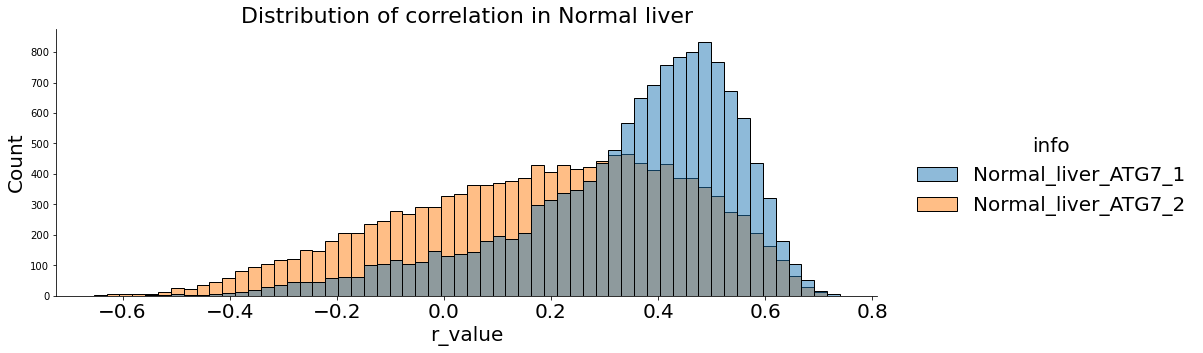

<Figure size 864x576 with 0 Axes>

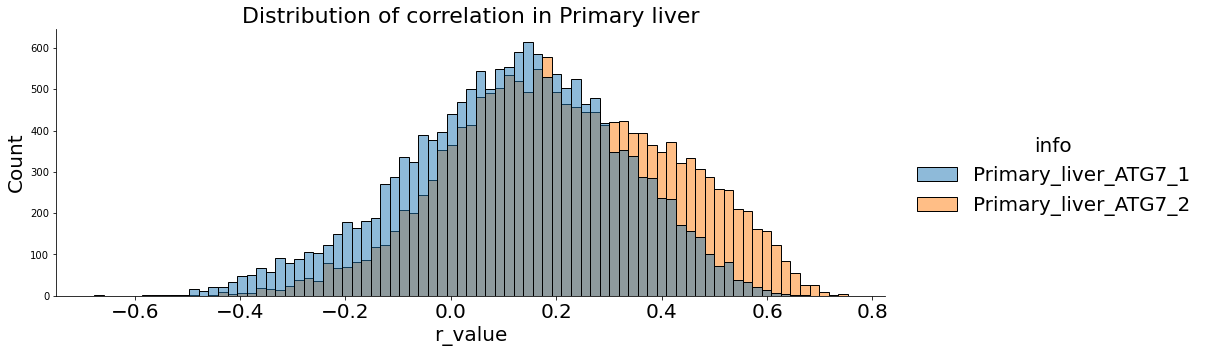

<Figure size 864x576 with 0 Axes>

In [15]:
#Merge ATG7(1) and ATG7(2)
data = [
        [all_corr_negpos_merged[0], all_corr_negpos_merged[1], 'Normal liver'],
        [all_corr_negpos_merged[2], all_corr_negpos_merged[3], 'Primary liver']
        ]

all_corr_isoforms_merged = []
for dfs in data:
  print('shape normal', dfs[0].shape)
  print('shape primary', dfs[1].shape)

  df_merged = pandas.concat([dfs[0], dfs[1]], axis=0)
  df_merged = df_merged.reset_index(drop = True)
  print('shape after merge', df_merged.shape)
  all_corr_isoforms_merged.append(df_merged)
  print()

#Distribution of correlation
data = [
        [all_corr_isoforms_merged[0], 'Normal liver'],
        [all_corr_isoforms_merged[1], 'Primary liver']
        ]

for dfs in data:
  seaborn.displot(dfs[0], x="r_value", hue='info', aspect = 2.6)
  label_title = 'Distribution of correlation in ' + dfs[1]
  plt.title(label_title, fontsize = 22)
  plt.show()
  plt.clf()
  print()

## 3) Selection of the 1% in extremities to see the top results

In [16]:
# have to select the 1% in extremities to have only the interesting one.
## all_corr_negpos_merged = norm iso1, norm iso2, prim iso1, prim iso2

all_corr_negpos_extremities = []

for df in all_corr_negpos_merged:
  df = df.sort_values(['r_value'], ascending = False)
  df = df.reset_index(drop = True)
  
  lenght = len(df)
  only_1perc = int(lenght*0.01)
  just_head = only_1perc
  just_tail = lenght - only_1perc

  df_head = df.iloc[0:just_head,:]
  df_tail = df.iloc[just_tail:,:]
  df_extremeties = pandas.concat([df_head, df_tail], axis=0)
  df_extremeties.reset_index(inplace=True)

  inform = df['info'][1]
  extremities_name = 'LIHC_corr_1%extremities'+ '_' +inform
    
    #save
  path = 'ATG7/TCGA_GTEX/liver/correlation/'
#   df_extremeties.to_excel(output_file_directory+path+extremities_name+'.xlsx', index=False)

  all_corr_negpos_extremities.append(df_extremeties)
    
all_corr_negpos_extremities[3]

,index,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
0,0,ENSG00000114030,KPNA1,0.753042,1.05626e-68,Primary_liver_ATG7_2
1,1,ENSG00000164219,PGGT1B,0.744521,2.20659e-66,Primary_liver_ATG7_2
2,2,ENSG00000037749,MFAP3,0.742706,6.70089e-66,Primary_liver_ATG7_2
3,3,ENSG00000269955,FMC1-LUC7L2,0.735637,4.63659e-64,Primary_liver_ATG7_2
4,4,ENSG00000198836,OPA1,0.720754,2.25661e-60,Primary_liver_ATG7_2
...,...,...,...,...,...,...
311,15891,ENSG00000256514,NaN,-0.541638,1.61955e-29,Primary_liver_ATG7_2
312,15892,ENSG00000139351,SYCP3,-0.551428,9.6747e-31,Primary_liver_ATG7_2
313,15893,ENSG00000148826,NKX6-2,-0.560033,7.52008e-32,Primary_liver_ATG7_2
314,15894,ENSG00000183260,ABHD16B,-0.582364,6.93525e-35,Primary_liver_ATG7_2


# V] Venn diagrams

In [17]:
all_corr_negpos_extremities[0]

,index,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
0,0,ENSG00000104979,C19orf53,0.739929,2.60296e-20,Normal_liver_ATG7_1
1,1,ENSG00000170296,GABARAP,0.730256,1.40199e-19,Normal_liver_ATG7_1
2,2,ENSG00000124357,NAGK,0.729068,1.71528e-19,Normal_liver_ATG7_1
3,3,ENSG00000167770,OTUB1,0.72825,1.96977e-19,Normal_liver_ATG7_1
4,4,ENSG00000135622,SEMA4F,0.725058,3.36342e-19,Normal_liver_ATG7_1
...,...,...,...,...,...,...
257,13112,ENSG00000198888,MT-ND1,-0.4937,4.2413e-08,Normal_liver_ATG7_1
258,13113,ENSG00000198899,MT-ATP6,-0.499963,2.68295e-08,Normal_liver_ATG7_1
259,13114,ENSG00000212907,MT-ND4L,-0.502289,2.25791e-08,Normal_liver_ATG7_1
260,13115,ENSG00000198712,MT-CO2,-0.523254,4.49567e-09,Normal_liver_ATG7_1


In [18]:
#separate pos and neg correlation
all_corr_positiv_extremities = []
all_corr_negativ_extremities = []

for df in all_corr_negpos_extremities:
    data_pos = df[df['r_value']>0]
    data_neg = df[df['r_value']<0]
    all_corr_positiv_extremities.append(data_pos)
    all_corr_negativ_extremities.append(data_neg)
print(len(all_corr_positiv_extremities))
all_corr_negativ_extremities[0].head()

4


,index,ensembl_gene_id,hgnc_symbol,r_value,p_value,info
131,12986,ENSG00000166819,PLIN1,-0.287625,0.00231267,Normal_liver_ATG7_1
132,12987,ENSG00000187017,ESPN,-0.289324,0.00217206,Normal_liver_ATG7_1
133,12988,ENSG00000243710,CFAP57,-0.290161,0.00210568,Normal_liver_ATG7_1
134,12989,ENSG00000197165,SULT1A2,-0.291035,0.00203831,Normal_liver_ATG7_1
135,12990,ENSG00000129151,BBOX1,-0.292329,0.00194216,Normal_liver_ATG7_1


## 1) Venn diagrams of correlation of all the genes

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


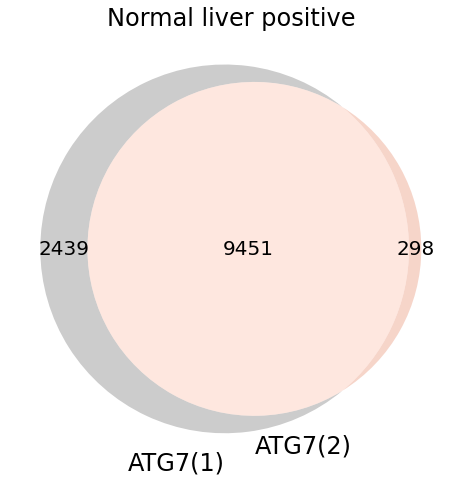

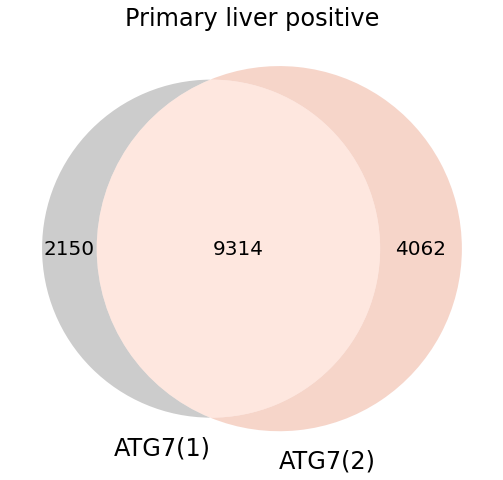

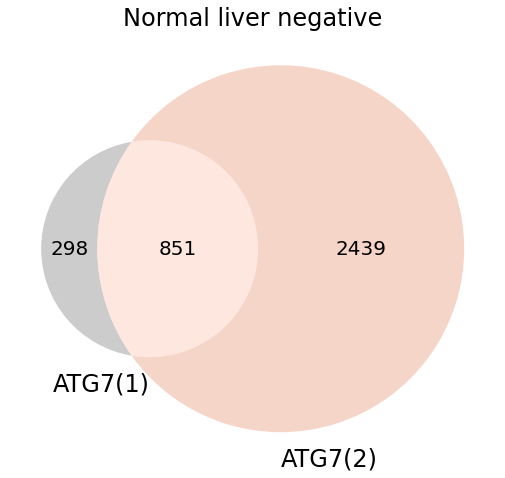

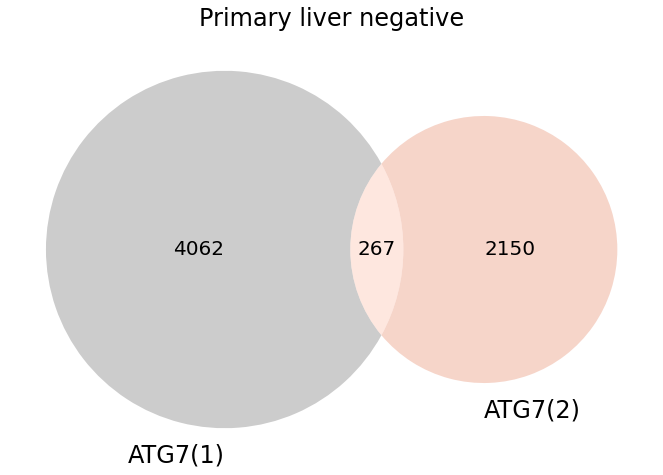

<Figure size 864x576 with 0 Axes>

In [19]:
#VENN DIAGRAMS ATG7(1) vs ATG7(2) For the 100% of the genes
data_pos =  [
         [all_positiv_corr_spearman[0], all_positiv_corr_spearman[1], 'Normal liver', 'positive'], 
         [all_positiv_corr_spearman[2], all_positiv_corr_spearman[3], 'Primary liver', 'positive']
         ]

data_neg =  [
         [all_negativ_corr_spearman[0], all_negativ_corr_spearman[1], 'Normal liver', 'negative'], 
         [all_negativ_corr_spearman[2], all_negativ_corr_spearman[3], 'Primary liver', 'negative']
         ]

data = data_pos + data_neg

list_only1 = []
list_only2 = []

for dfs in data:
  set1 = set(dfs[0]['ensembl_gene_id'])
  set2 = set(dfs[1]['ensembl_gene_id'])
  subset = (set1, set2)

  #just to save some results in list
  with_only1 = set2.symmetric_difference(set1) & set1
  list_only1.append(with_only1)

  with_only2 = set2.symmetric_difference(set1) & set2
  list_only2.append(with_only2)

  #Venn Diagram
  venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
  label_title = dfs[2] + ' ' + dfs[3]
  plt.title(label_title)
  plt.show()
  plt.clf()
  print()

## 2) Venn diagrams of the 1% the most correlated genes with the two isoforms for each tissue

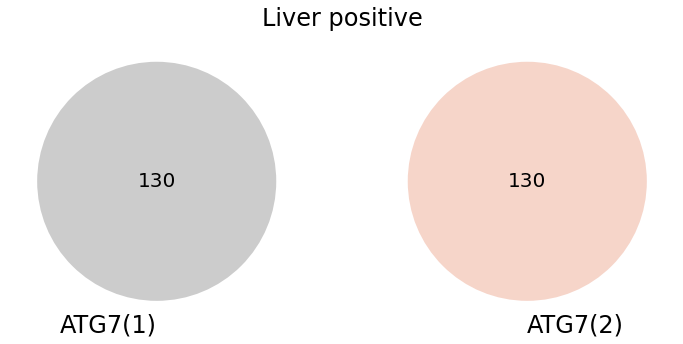

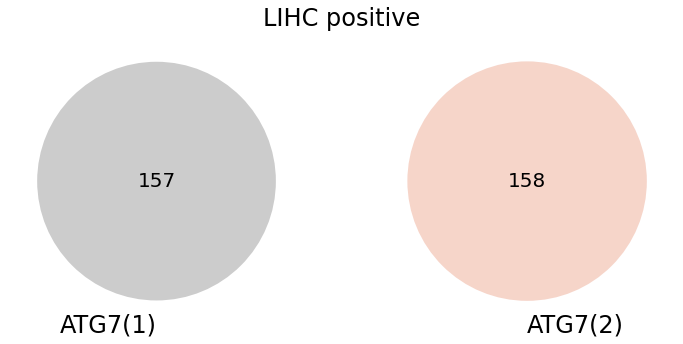

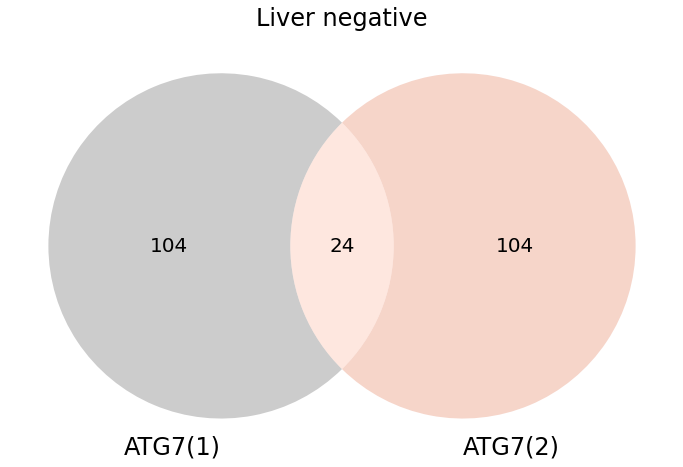

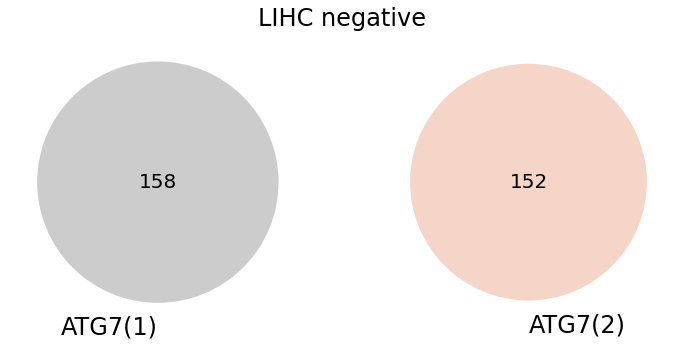

<Figure size 864x576 with 0 Axes>

In [20]:
#VENN DIAGRAMS ATG7(1)vs ATG7(2) FOR the 1% of the genes the most correlated
data_pos =  [
         [all_corr_positiv_extremities[0], all_corr_positiv_extremities[1], 'Liver', 'positive'], 
         [all_corr_positiv_extremities[2], all_corr_positiv_extremities[3], 'LIHC', 'positive']
         ]

data_neg =  [
         [all_corr_negativ_extremities[0], all_corr_negativ_extremities[1], 'Liver', 'negative'], 
         [all_corr_negativ_extremities[2], all_corr_negativ_extremities[3], 'LIHC', 'negative']
         ]

data = data_pos + data_neg

for dfs in data:
    set1 = set(dfs[0]['hgnc_symbol'])
    set2 = set(dfs[1]['hgnc_symbol'])
    subset = (set1, set2)

    #save results in list
    with_only1 = list(set2.symmetric_difference(set1) & set1)
    with_only2 = list(set2.symmetric_difference(set1) & set2)
    intersection = set1.intersection(set2)

    #create a dictionnary
    d = dict(Only_ATG7_1 = with_only1, Only_ATG7_2 = with_only2, Intersection= intersection)

    #Convert to dataframe
    df_only_and_intersection = pandas.DataFrame.from_dict(d, orient='index')
    name_file = 'only_and_intersection_isos_'+dfs[2]+'_'+dfs[3]
       
    #Transpose to have a better table and save
    df_only_and_intersection = df_only_and_intersection.transpose()
    df_only_and_intersection['info'] = dfs[2]+dfs[3]
    
    path = 'ATG7/TCGA_GTEX/liver/correlation/tables/'
    df_only_and_intersection.to_excel(output_file_directory+path+name_file+'.xlsx', index=False)
    
    #Venn Diagram
    venn2(subset, set_labels=('ATG7(1)', 'ATG7(2)'), set_colors=('grey', 'darksalmon'))
    label_title = dfs[2] + ' ' + dfs[3]
    plt.title(label_title)
    plt.show()
    plt.clf()
    print()

## 3) Venn diagrams of the 1% the most correlated genes for each isoform in normal and primary tissues

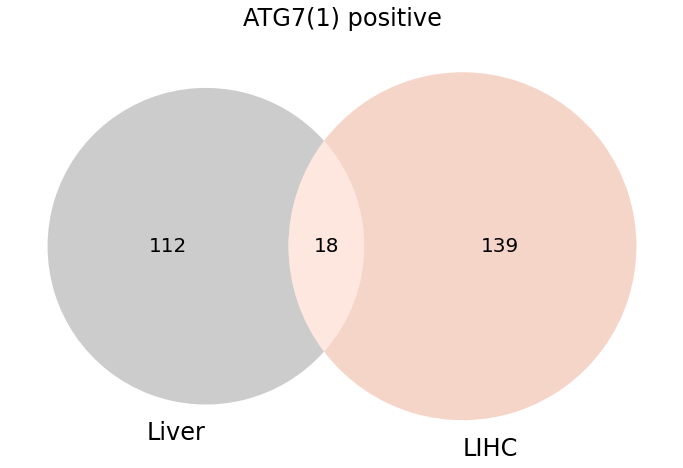

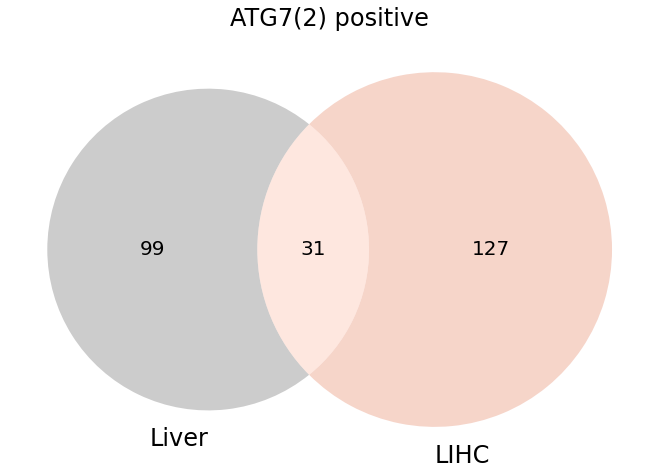

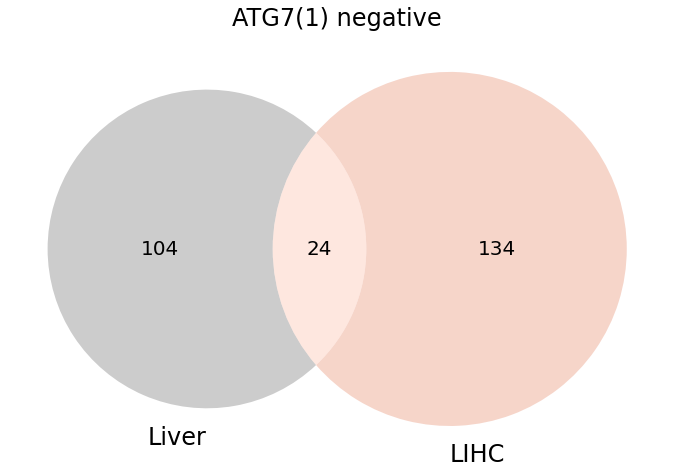

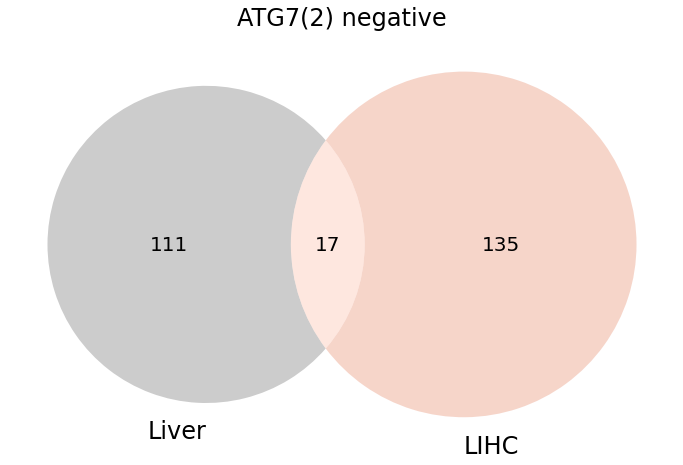

<Figure size 864x576 with 0 Axes>

In [21]:
#VENN DIAGRAMS FOR NORM vs PRIM for the 1% of the genes the most correlated
data_pos =  [
         [all_corr_positiv_extremities[0], all_corr_positiv_extremities[2], 'ATG7(1)', 'positive'], 
         [all_corr_positiv_extremities[1], all_corr_positiv_extremities[3], 'ATG7(2)', 'positive']
         ]

data_neg =  [
         [all_corr_negativ_extremities[0], all_corr_negativ_extremities[2], 'ATG7(1)', 'negative'], 
         [all_corr_negativ_extremities[1], all_corr_negativ_extremities[3], 'ATG7(2)', 'negative']
         ]

data = data_pos + data_neg

for dfs in data:
    set1 = set(dfs[0]['hgnc_symbol'])
    set2 = set(dfs[1]['hgnc_symbol'])
    subset = (set1, set2)

    #save results in list
    with_normal = list(set2.symmetric_difference(set1) & set1)
    with_primary = list(set2.symmetric_difference(set1) & set2)
    intersection = set1.intersection(set2)

    #create a dictionnary
    d = dict(Only_normal = with_normal, Only_primary = with_primary, Intersection= intersection)

    #Convert to dataframe
    df_only_and_intersection = pandas.DataFrame.from_dict(d, orient='index')
    name_file = 'only_and_intersection_isos_'+dfs[2]+'_'+dfs[3]
       
    #Transpose to have a better table and save
    df_only_and_intersection = df_only_and_intersection.transpose()
    df_only_and_intersection['info'] = dfs[2]+dfs[3]
    
    path = 'ATG7/table_correlation_enrichr/all_tissue_ATG7/corr_extremities/'
#     df_only_and_intersection.to_excel(output_file_directory+path+name_file+'.xlsx', index=False)
    
    #Venn Diagram
    venn2(subset, set_labels=('Liver', 'LIHC'), set_colors=('grey', 'darksalmon'))
    label_title = dfs[2] + ' ' + dfs[3]
    plt.title(label_title)
    plt.show()
    plt.clf()
    print()
